In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings

In [2]:
gs= pd.read_csv('korea_cvs.csv')

In [3]:
gs

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구
5,서울특별시,20160101,F,20~39,생리대,78,종로구
6,서울특별시,20160101,F,20~39,생수,56,종로구
7,서울특별시,20160101,F,20~39,숙취해소제,14,종로구
8,서울특별시,20160101,F,20~39,스타킹,28,종로구
9,서울특별시,20160101,F,20~39,아이스크림,211,종로구


In [4]:
gs.isnull().sum()

korea_cvs.pvn_nm      0
korea_cvs.sale_dt     0
korea_cvs.gen_cd      0
korea_cvs.age_cd      0
korea_cvs.category    0
korea_cvs.adj_qty     0
korea_cvs.bor_nm      0
dtype: int64

In [5]:
gs['korea_cvs.pvn_nm'].unique()

array(['서울특별시', '인천광역시', '경기도'], dtype=object)

In [6]:
gs['korea_cvs.pvn_nm'].value_counts()

서울특별시    1241047
경기도      1122999
인천광역시     343740
Name: korea_cvs.pvn_nm, dtype: int64

In [7]:
gs.head(3)

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구


# 년월일에서 년만 가져오기

In [8]:
gs['korea_cvs.sale_dt'] = (gs['korea_cvs.sale_dt']/10000).astype('int')

In [ ]:
gs['korea_cvs.sale_dt'].item

# 도시와 구역별로 유니크값

In [9]:
gs.groupby(gs['korea_cvs.pvn_nm'])['korea_cvs.bor_nm'].unique()

korea_cvs.pvn_nm
경기도      [수원시, 성남시, 의정부시, 안양시, 부천시, 광명시, 안산시, 고양시, 과천시,...
서울특별시    [종로구, 중구, 용산구, 성동구, 광진구, 동대문구, 중랑구, 성북구, 강북구, ...
인천광역시     [중구, 동구, 미추홀구, 연수구, 남동구, 부평구, 계양구, 서구, 강화군, 옹진군]
Name: korea_cvs.bor_nm, dtype: object

In [ ]:
gs['korea_cvs.sale_dt'].astype(str)

In [10]:
gs2 = gs[['korea_cvs.bor_nm', 'korea_cvs.category','korea_cvs.adj_qty']]
gs2['month'] = gs['korea_cvs.sale_dt'].apply(lambda x: str(x)[:6])
gs2

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,korea_cvs.bor_nm,korea_cvs.category,korea_cvs.adj_qty,month
0,종로구,라면,7,2016
1,종로구,과자,655,2016
2,종로구,라면,282,2016
3,종로구,마스크,35,2016
4,종로구,맥주,183,2016
5,종로구,생리대,78,2016
6,종로구,생수,56,2016
7,종로구,숙취해소제,14,2016
8,종로구,스타킹,28,2016
9,종로구,아이스크림,211,2016


In [11]:
import numpy as np
gs2.groupby('month').\
agg({'korea_cvs.adj_qty' : [np.mean, np.sum],'korea_cvs.bor_nm' : np.size})

korea_cvs.adj_qty           korea_cvs.bor_nm
                   mean       sum             size
month                                             
2016          91.468293  84454596           923321
2017          86.783920  78470628           904207
2018          81.489350  71731652           880258

# 나이별로 값 바꾸기

In [12]:
age = gs['korea_cvs.age_cd'].unique()
age_point_replace = {'00~19' : 1, '20~39' : 2, '40~59' : 3, '60~99' : 4}
gs['korea_cvs.age_cd'].apply(lambda x : age_point_replace.get(x))

0          1
1          2
2          2
3          2
4          2
5          2
6          2
7          2
8          2
9          2
10         2
11         3
12         3
13         3
14         3
15         3
16         3
17         3
18         3
19         3
20         4
21         4
22         4
23         1
24         2
25         2
26         2
27         2
28         2
29         2
          ..
2707756    3
2707757    3
2707758    3
2707759    2
2707760    4
2707761    2
2707762    2
2707763    3
2707764    1
2707765    1
2707766    2
2707767    2
2707768    3
2707769    1
2707770    2
2707771    2
2707772    3
2707773    4
2707774    1
2707775    1
2707776    1
2707777    2
2707778    2
2707779    3
2707780    4
2707781    3
2707782    1
2707783    2
2707784    4
2707785    2
Name: korea_cvs.age_cd, Length: 2707786, dtype: int64

In [13]:
gs['korea_cvs.age_cd'] = gs['korea_cvs.age_cd'].apply(lambda x : age_point_replace.get(x))

In [14]:
gs.head(2)

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,2016,F,1,라면,7,종로구
1,서울특별시,2016,F,2,과자,655,종로구


# 성별 남자1 여자0

In [15]:
gs['korea_cvs.gen_cd'] = LabelEncoder().fit_transform(gs['korea_cvs.gen_cd'])
gs.head(3)

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,2016,0,1,라면,7,종로구
1,서울특별시,2016,0,2,과자,655,종로구
2,서울특별시,2016,0,2,라면,282,종로구


In [16]:
gs.groupby(['korea_cvs.pvn_nm','korea_cvs.bor_nm'])['korea_cvs.gen_cd'].sum()

korea_cvs.pvn_nm  korea_cvs.bor_nm
경기도               가평군양평군              19701
                  고양시                 25962
                  과천시                 12301
                  광명시                 17642
                  광주시                 20993
                  구리시                 13403
                  군포시                 20098
                  김포시                 16472
                  남양주시                21934
                  동두천시                13367
                  부천시                 25204
                  성남시                 28265
                  수원시                 26571
                  시흥시                 22234
                  안산시                 22131
                  안양시                 25557
                  양주시                 14863
                  여주시이천시              18387
                  연천군포천군              18465
                  오산시안성시평택시           24872
                  용인시                 29232
                  의왕시                 146

In [ ]:
gs['korea_cvs.sale_dt'].astype(str)

In [17]:
ion = pd.pivot_table(gs, index=('korea_cvs.pvn_nm','korea_cvs.bor_nm','korea_cvs.category','korea_cvs.sale_dt'), aggfunc=sum)
ion

korea_cvs.adj_qty  \
korea_cvs.pvn_nm korea_cvs.bor_nm korea_cvs.category korea_cvs.sale_dt                      
경기도              가평군양평군           과자                 2016                          211660   
                                                     2017                          208943   
                                                     2018                          161911   
                                  라면                 2016                          141606   
                                                     2017                          129124   
                                                     2018                          126399   
                                  마스크                2016                            1590   
                                                     2017                            2265   
                                                     2018                            2751   
                                  맥주                 2016                           77729   
                                                     2017                           55358   
                                                     2018                           53391   
                                  면도기                2016                            1897   
                                                     2017                            1554   
                                                     2018                            1641   
                                  생리대                2016                            8653   
                                                     2017                            7571   
                                                     2018                            6378   
                                  생수                 2016                           72893   
                                                     2017                           63455   
                                                     2018                           52519   
                                  숙취해소제              2016                           11046   
                                                     2017                           12543   
                                                     2018                           12314   
                                  스타킹                2016                            2961   
                                                     2017                            2289   
                                                     2018                            2177   
                                  아이스크림              2016                          144725   
                                                     2017                          115720   
                                                     2018                          107091   
...                                                                                   ...   
인천광역시            중구               마스크                2016                             854   
                                                     2017                            1492   
                                                     2018                            1926   
                                  맥주                 2016                           80781   
                                                     2017                           87984   
                                                     2018                           75182   
                                  면도기                2016                            1708   
                                                     2017                            1358   
                                                     2018                            1463   
                                  생리대                2016                            6125   
                                                     2017                

In [18]:
gsp = pd.pivot_table(gs, index=('korea_cvs.pvn_nm','korea_cvs.bor_nm','korea_cvs.category','korea_cvs.sale_dt','korea_cvs.gen_cd'))
gsp

korea_cvs.adj_qty  \
korea_cvs.pvn_nm korea_cvs.bor_nm korea_cvs.category korea_cvs.sale_dt korea_cvs.gen_cd                      
경기도              가평군양평군           과자                 2016              0                        107.798442   
                                                                       1                         84.904121   
                                                     2017              0                         95.855327   
                                                                       1                         89.929440   
                                                     2018              0                         85.669339   
                                                                       1                         69.403270   
                                  라면                 2016              0                         57.844488   
                                                                       1                         63.720000   
                                                     2017              0                         50.783415   
                                                                       1                         59.058238   
                                                     2018              0                         50.943378   
                                                                       1                         58.095087   
                                  마스크                2016              0                         13.468750   
                                                                       1                         11.030303   
                                                     2017              0                         15.056818   
                                                                       1                         12.876712   
                                                     2018              0                         11.887931   
                                                                       1                         12.822430   
                                  맥주                 2016              0                         57.914326   
                                                                       1                         44.998767   
                                                     2017              0                         41.690658   
                                                                       1                         35.167500   
                                                     2018              0                         38.675939   
                                                                       1                         34.019947   
                                  면도기                2016              0                          8.533333   
                                                                       1                          8.858407   
                                                     2017              0                          9.614458   
                                                                       1                          9.108434   
                                                     2018              0                          9.531915   
                                                                       1                         16.569444   
...                                                                                                    ...   
인천광역시            중구               숙취해소제              2016              0                         14.651261   
                                                                       1                         14.652510   
                                                     2017              0                         14.984064   
                                                                       1                         13.854671   
                   

In [ ]:
dodo = gs.groupby('korea_cvs.pvn_nm')['korea_cvs.bor_nm'].unique()

dodo

In [19]:
gs.groupby('korea_cvs.pvn_nm')['korea_cvs.bor_nm'].unique()

korea_cvs.pvn_nm
경기도      [수원시, 성남시, 의정부시, 안양시, 부천시, 광명시, 안산시, 고양시, 과천시,...
서울특별시    [종로구, 중구, 용산구, 성동구, 광진구, 동대문구, 중랑구, 성북구, 강북구, ...
인천광역시     [중구, 동구, 미추홀구, 연수구, 남동구, 부평구, 계양구, 서구, 강화군, 옹진군]
Name: korea_cvs.bor_nm, dtype: object

In [ ]:
gs['korea_cvs.gen_cd'].plot(kind='bar')

# 도시별로 뽑기

In [20]:
town= gs.groupby(['korea_cvs.pvn_nm','korea_cvs.category'])['korea_cvs.adj_qty'].sum()
town

korea_cvs.pvn_nm  korea_cvs.category
경기도               과자                    28949192
                  라면                    21558997
                  마스크                     307649
                  맥주                     9901729
                  면도기                     190349
                  생리대                    1085131
                  생수                     6435782
                  숙취해소제                  1873028
                  스타킹                     598683
                  아이스크림                 14725472
                  우산                      435589
                  탄산음료                   4886615
서울특별시             과자                    40609116
                  라면                    24486364
                  마스크                     576291
                  맥주                    12161740
                  면도기                     309290
                  생리대                    2122832
                  생수                    10581202
                  숙취해소제         

In [21]:
dosi = gs['korea_cvs.pvn_nm'].unique()
dosi_point_replace = {'서울특별시' : 1, '경기도' : 2, '인천광역시' : 3}
gs['korea_cvs.pvn_nm'] = gs['korea_cvs.pvn_nm'].apply(lambda x : dosi_point_replace.get(x))

In [22]:
gs.head(2)

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,1,2016,0,1,라면,7,종로구
1,1,2016,0,2,과자,655,종로구


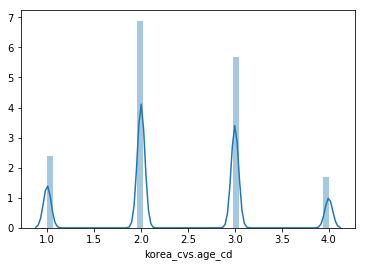

In [23]:
sns.distplot(gs['korea_cvs.age_cd'])

In [ ]:
sns.pairplot(gs,hue='korea_cvs.gen_cd',palette='vlag')

# 품목과 수량

In [24]:
gs.groupby('korea_cvs.category')['korea_cvs.adj_qty'].sum()

korea_cvs.category
과자       76111229
라면       51583191
마스크        940473
맥주       24338889
면도기        538218
생리대       3437552
생수       18235878
숙취해소제     5299560
스타킹       1911245
아이스크림    38652798
우산        1614216
탄산음료     11993627
Name: korea_cvs.adj_qty, dtype: int64

In [25]:
pummuk = gs.groupby('korea_cvs.category')['korea_cvs.adj_qty'].sum()

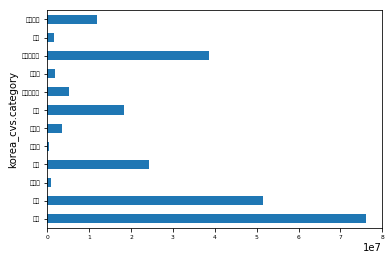

In [26]:
pummuk.plot(kind='barh',fontsize=6)

# 시각화

In [ ]:
gs.groupby('korea_cvs.bor_nm')['korea_cvs.category'].plot(kind='bar',stacked=True)

In [ ]:
gs.groupby('korea_cvs.bor_nm')

In [ ]:
gs.plot(kind='bar',by='korea_cvs.bor_nm')

In [ ]:
gs['korea_cvs.gen_cd'].value_counts().plot(kind='bar')

In [ ]:
plt.rc('font',family='NanumGothic')
print(plt.rcparams['font.family'])

%matplotlib inline


In [ ]:
import matplotlib.font_manager as fm

In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:]

In [ ]:
a =  fm.FontProperties(fname=font_list[0])
a.get_name()

In [ ]:
from matplotlib import rc, font_manager
rc('font', family='NanumGothic')
t= np.arange(0.0,2.0,0.01)
s = 1+ np.sin(2*np.pi*t)

plt.plot(t,s)
plt.title('한글테스트')
plt.show()

In [ ]:
plt.rc('font', family='batang')
print(plt.rcparams['font,family'])



In [ ]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

font_location = 'C:\\Windows\\Fonts\\NanumGothic.otf' 
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=NanumGothic.otf)

%matplotlib inline




In [ ]:
sns.factorplot('korea_cvs.category',data=gs,hue='korea_cvs.pvn_nm',kind='count')

In [ ]:
sns.factorplot('korea_cvs.category',data=gs,hue='korea_cvs.sale_dt',kind='count')

In [ ]:
sns.factorplot('korea_cvs.sale_dt',data=gs,kind='count')

In [ ]:
gs.groupby('korea_cvs.pvn_nm')['korea_cvs.gen_cd'].value_counts().plot(kind='bar')

In [ ]:
sns.factorplot('korea_cvs.pvn_nm',data=gs,kind='count')

In [ ]:
sns.factorplot('korea_cvs.pvn_nm', data=gs, kind='count', hue='korea_cvs.gen_cd')

In [ ]:
sns.catplot('korea_cvs.category', data=gs, kind='count', palette='PuBuGn_r')

In [ ]:
구별로 int로 바꿔야함
sns.catplot('korea_cvs.bor_nm', data= gs, hue='korea_cvs.pvn_nm', hue_order=[1,2,3],kind='count')

In [27]:
gs.head()

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,1,2016,0,1,라면,7,종로구
1,1,2016,0,2,과자,655,종로구
2,1,2016,0,2,라면,282,종로구
3,1,2016,0,2,마스크,35,종로구
4,1,2016,0,2,맥주,183,종로구


In [31]:
gs['korea_cvs.sale_dt'].astype(int)

0          2016
1          2016
2          2016
3          2016
4          2016
5          2016
6          2016
7          2016
8          2016
9          2016
10         2016
11         2016
12         2016
13         2016
14         2016
15         2016
16         2016
17         2016
18         2016
19         2016
20         2016
21         2016
22         2016
23         2016
24         2016
25         2016
26         2016
27         2016
28         2016
29         2016
           ... 
2707756    2018
2707757    2018
2707758    2018
2707759    2018
2707760    2018
2707761    2018
2707762    2018
2707763    2018
2707764    2018
2707765    2018
2707766    2018
2707767    2018
2707768    2018
2707769    2018
2707770    2018
2707771    2018
2707772    2018
2707773    2018
2707774    2018
2707775    2018
2707776    2018
2707777    2018
2707778    2018
2707779    2018
2707780    2018
2707781    2018
2707782    2018
2707783    2018
2707784    2018
2707785    2018
Name: korea_cvs.sale_dt,

In [32]:
gs['korea_cvs.bor_nm'] = pd.get_dummies(gs['korea_cvs.bor_nm'])
gs['korea_cvs.category'] = pd.get_dummies(gs['korea_cvs.category'])
gs.head()

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,1,2016,0,1,0,7,0
1,1,2016,0,2,1,655,0
2,1,2016,0,2,0,282,0
3,1,2016,0,2,0,35,0
4,1,2016,0,2,0,183,0


In [ ]:
gs.head()

In [ ]:
bornex = gs.as_matrix()
bornex[:10]

# 회귀

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = gs[['korea_cvs.pvn_nm','korea_cvs.gen_cd','korea_cvs.sale_dt','korea_cvs.age_cd']]
y = gs['korea_cvs.adj_qty']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
predictions = logmodel.predict(x_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_test, predictions))

[[191135      0      0 ...      0      0      0]
 [120521      0      0 ...      0      0      0]
 [ 75091      0      0 ...      0      0      0]
 ...
 [     1      0      0 ...      0      0      0]
 [     1      0      0 ...      0      0      0]
 [     1      0      0 ...      0      0      0]]


In [41]:
print(classification_report(y_test, predictions))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           7       0.21      1.00      0.35    191135
          14       0.00      0.00      0.00    120521
          21       0.00      0.00      0.00     75091
          28       0.00      0.00      0.00     58233
          35       0.00      0.00      0.00     44313
          42       0.00      0.00      0.00     37085
          49       0.00      0.00      0.00     30196
          56       0.00      0.00      0.00     26326
          63       0.00      0.00      0.00     22615
          70       0.00      0.00      0.00     20266
          78       0.00      0.00      0.00     17797
          85       0.00      0.00      0.00     15911
          92       0.00      0.00      0.00     14224
          99       0.00      0.00      0.00     13182
         106       0.00      0.00      0.00     12203
         113       0.00      0.00      0.00     11085
         120       0.00      0.00      0.00     10177
         127       0.00    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
